## CHAPTER 1 왜 금융 분석에 파이썬을 사용하는 가

### 파이썬의 장점 

1. 오픈소스
2. 인터프리터 언어
    표준 CPython 구현은 파이썬 코드를 런타임 시에 실행 가능한 바이트 코드로 변환하는 인터프리터이다.
3. 멀티패러다임
    객체지향에서 명령형 프로그래밍, 함수형 프로그래밍, 절차적 프로그래밍 까지 지원
4. 다목적
    저수준의 시스템 기능 구현 & 고수준의 해석 업무
5. 크로스 플랫폼
6. 동적 타입
7. 들여쓰기 인식
8. 가비지 콜렉션

### PEP 20(Python Enhancement Proposal 20)

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [3]:
import math
math.log?

In [4]:
math.log??

### 과학기술용 표준 라이브러리 모음(Scientific stack)

- Numpy
- SciPy
- matplotlib
- PyTables
- pandas

금융 산업이 기술의 진보에 의해 영향을 받는 한 가지 측면은 바로 금융거래가 결정되고 집행되는 속도와 빈도

### 금융 분야의 기술 특징

- 금융산업의 기술 비용
- 새로운 비즈니스와 혁신을 가능하게 하는 기술
- 금융산업의 진입 장벽으로서의 기술과 전문 인력
- 증가하는 속도와 빈도, 정보의 양
- 실시간 분석의 증가

In [6]:
# 블랙-숄즈-머튼 모형을 사용한 유러피안 콜 옵션의 몬테카를로 방식 가격 계산

import numpy as np

# parameter 
S0 = 100 # 초기의 주가지수
K = 105 # 행사가 
T = 1 # 만기까지 남은 시간
r = 0.05 # 무위험 이자율
sigma = 0.2 # 변동성 

I = 100000 # 시뮬레이션 횟수

# 가격결정 알고리즘
z = np.random.standard_normal(I) # 의사 난수
ST = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*z) # 만기 시의 주가지수
hT = np.maximum(ST - K, 0) # 만기 시의 내재 가치
C0 = np.exp(-r*T) * np.sum(hT) / I # 몬테카를로 추정식 

print(C0)

8.007830977578639


### 구글 주가와 연간 변동성

In [8]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web # pip install pandas-datareader 필요

In [14]:
# 필요한 자료를 구글에서 가져오기

goog = web.DataReader('GOOG', 'yahoo', start='8/30/2017', end='8/29/2022')
goog.tail()
# data_source 자리에 google을 넣으면 오류 발생

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-23,115.930000,114.300003,114.320000,114.769997,14390700.0,114.769997
2022-08-24,115.717003,113.779999,114.449997,114.699997,16051200.0,114.699997
2022-08-25,117.779999,115.050003,115.150002,117.699997,14874700.0,117.699997
2022-08-26,116.599998,111.220001,115.809998,111.300003,31664800.0,111.300003
2022-08-29,111.959999,109.809998,110.779999,110.339996,20386100.0,110.339996


In [15]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
goog['Volatility'] = goog['Log_Ret'].rolling(window=252, center=False).std()

In [16]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
2022-08-23,115.930000,114.300003,114.320000,114.769997,14390700.0,114.769997,-0.002611,0.020926
2022-08-24,115.717003,113.779999,114.449997,114.699997,16051200.0,114.699997,-0.000610,0.020916
2022-08-25,117.779999,115.050003,115.150002,117.699997,14874700.0,117.699997,0.025819,0.020982
2022-08-26,116.599998,111.220001,115.809998,111.300003,31664800.0,111.300003,-0.055910,0.021265
2022-08-29,111.959999,109.809998,110.779999,110.339996,20386100.0,110.339996,-0.008663,0.021240


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

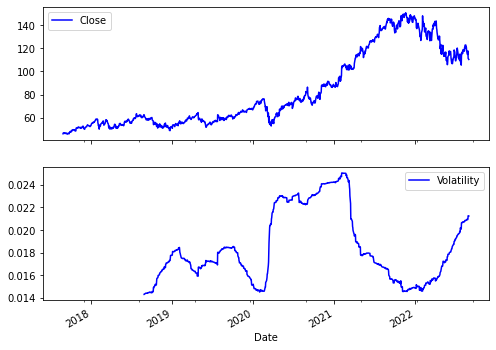

In [18]:
goog[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 6))

파이썬은 인터프리터 언어라서 계산량이 많은 금융 분야 작업에서는 느릴 수 있지만 성능을 향상 시킬 수 있음 

- 패러다임 </br>
    - 적절한 라이브러리를 사용
- 컴파일 </br>
    - Cython </br>
    - Numba
- 병렬화 </br>
    - 파이썬을 쓰면 쉽게 병렬처리를 구현가능